## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns

In [118]:
import pandas as pd
import seaborn as sns

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
penguins = sns.load_dataset("penguins").dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### De species voorspellen op basis van de bill_length_mm

In [121]:
features= ['bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 2) # Increase max_depth to see effect in the plot
dt.fit(penguins[features], penguins['species'])

DecisionTreeClassifier(max_depth=2)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

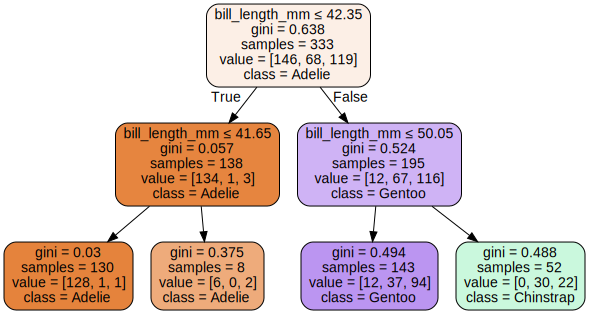

In [124]:
plot_tree_classification(dt, features, penguins.species.unique())

Ik snap hoe deze decision tree inelkaar zit. De voorspellingen zijn dat de species 'Adelie' voorkomt als de bill_length_mm kleiner is dan 42.35, tussen 42.35 en 50.05 voor Gentoo en boven 50.05 voor Chinstrap. De samples zijn met hoeveel data de decision tree de beslissing mee heeft gemaakt.

### Test 30% / Train 70%

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, stratify=penguins['species'], random_state=42)
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


233 rijen voor train (70%), 100 voor test (30%). Species is onze target variabele. We proberen achter de species te komen d.m.v. de bill_length_mm

In [127]:
features= ['bill_length_mm']
dt_classification = DecisionTreeClassifier(max_depth = 2)
dt_classification.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=2)

In [128]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [129]:
predictionsOnTrainset = dt_classification.predict(penguins_train[features])
predictionsOnTestset = dt_classification.predict(penguins_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8068669527896996
Accuracy on test set 0.7


De nauwkeurigheid van de training set is hoger. Dit komt denk ik door het feit dat de training set met meer data te werken kan hebben (70%) waardoor het nauwkeuriger wordt. Deze verschil had ik dus van ten voren wel verwacht. 

## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your own dataset.
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
    

In [130]:
import pandas as pd
import seaborn as sns

Ik heb gekozen voor een andere dataset wat misschien interessanter is bij deze opdracht. De dataset is van een bank en ze zouden het erg op prijs stellen als men voor hen zou kunnen voorspellen wie er wordt gekarnd, zodat ze proactief naar de klant kunnen gaan om hen betere diensten te verlenen en de klanten van beslissing kunnen veranderen. In dit geval kijken we naar de categorische kolom 'maanden inactief afgelopen 12 maanden'.

In [131]:
bankchurn = pd.read_csv (r'bankchurners.csv')

In [132]:
bankchurn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [133]:
bankchurn.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

### De verloopvlag voorspellen op basis van hoeveel transacties ze afgelopen 12 maanden hebben gedaan

In [134]:
features= ['Months_Inactive_12_mon']
dt = DecisionTreeClassifier(max_depth = 3) # Increase max_depth to see effect in the plot
dt.fit(bankchurn[features], bankchurn['Attrition_Flag'])

DecisionTreeClassifier(max_depth=3)

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

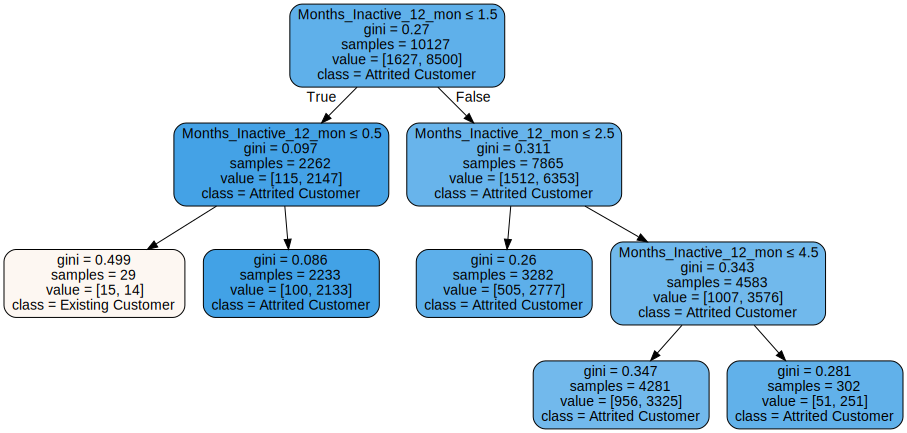

In [137]:
plot_tree_classification(dt, features, bankchurn.Attrition_Flag.unique())

We zien hier dat als een klant langer dan een halve maand inactief is, die waarschijnlijk weg gaat bij de bank. Alleen bestaande klanten hebben een inactiviteit van minder dan een halve maand.

### Test 30% / Train 70%

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
bankchurners_train, bankchurners_test = train_test_split(bankchurn, test_size=0.3, stratify=bankchurn['Attrition_Flag'], random_state=42)
print(bankchurners_train.shape, bankchurners_test.shape)

(7088, 23) (3039, 23)


7088 rijen voor train (70%), 3039 voor test (30%). De verloopvlag is onze target variabele. We proberen achter de verloopvlag te komen d.m.v. het aantal maanden inactiviteit.

In [140]:
features= ['Months_Inactive_12_mon']
dt_classification = DecisionTreeClassifier(max_depth = 2)
dt_classification.fit(bankchurners_train[features], bankchurners_train['Attrition_Flag'])

DecisionTreeClassifier(max_depth=2)

In [141]:
predictionsOnTrainset = dt_classification.predict(bankchurners_train[features])
predictionsOnTestset = dt_classification.predict(bankchurners_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, bankchurners_train.Attrition_Flag)
accuracyTest = calculate_accuracy(predictionsOnTestset, bankchurners_test.Attrition_Flag)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.8394469525959368
Accuracy on test set 0.8394208621256992


De nauwkeurigheid van de training én test zijn beide hoog, waarvan de training iets nauwkeuriger is met +-0.0002%. Beide training en test set is in dit geval bijna gelijk, waarschijnlijk door het feit dat het beide meer data heeft. Intotaal namelijk 10k.